# 0 前提
  + 第一次的作业，虽然前面看了那么多`numpy`,`pandas`,`matplotlib`的用法。但是用的相当不熟练，所以这次作业在很多线性代数运算的地方并没有用类库中常用的方法，而是自己造轮子出来的（比如 代价函数 和 梯度下降）。
  + 接下来就是对照着参考答案，用类库来实现 `ex1`。
  + 自己造轮子在 python 中并不推荐，后面的实验如果类库用的很熟了那么就直接上类库了，不再造轮子

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 Simple Octave/MATLAB function

In [2]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# 2  Linear regression with one variable

## 2.1  Plotting the Data

In [3]:
fpath = "ex1data1.txt"
df = pd.read_csv(
    fpath,
    sep=",",
    names=['population', 'profit']
)

In [4]:
df

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


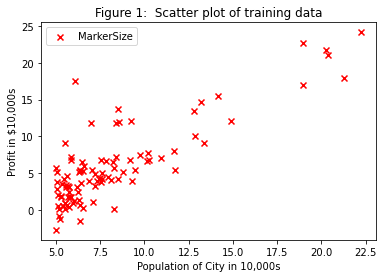

In [5]:
plt.scatter(df['population'],df['profit'], label='MarkerSize', color='r',marker="x")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Figure 1:  Scatter plot of training data')
plt.legend()
plt.show()

## 2.2  Gradient Descent

### 2.2.2  Implementation

In [6]:
X = pd.DataFrame({
    'x0':1,
    'x1':df['population']
})

In [7]:
theta = pd.DataFrame([0,0])
theta

,0
0,0
1,0


In [8]:
iterations = 1500; # 迭代次数
alpha = 0.01;     # 学习率

### 2.2.3  Computing the costJ(θ)

In [9]:
# costJ ：先不用任何库，后面看参考答案的时候再统一标准
def costJ(X,df,theta):
    m = df.shape[0]    # 行数
    theta0 = theta.iloc[0,0]
    theta1 = theta.iloc[1,0]
    # 累加
    sum = 0.0
    for i in range(m):
        x0 = X.iloc[i,0]  # 1
        x1 = X.iloc[i,1]
        y = df.iloc[i,1]
        sum = sum + (x0*theta0+x1*theta1-y) ** 2 # ** ：指数
    return sum/(2*m)

In [10]:
print(costJ(X,df,theta))

32.072733877455654


### 2.2.4  Gradient descent

In [11]:
def GradientDescent(X,df,theta,alpha):
    new_theta = pd.DataFrame([0,0])
    m = df.shape[0]    # 行数
    theta0 = theta.iloc[0,0]
    theta1 = theta.iloc[1,0]
    
    for j in range(theta.shape[0]):
        # 累加
        sum = 0.0
        for i in range(m):
            x0 = X.iloc[i,0]  # 1
            x1 = X.iloc[i,1]
            y = df.iloc[i,1]
            x_ij = X.iloc[i,j]
            sum = sum + (x0*theta0+x1*theta1-y)*x_ij
        new_theta.iloc[j,0] = theta.iloc[j,0] - alpha/m*sum
    return new_theta

In [12]:
theta = pd.DataFrame([0,0])   # 如果没有这句话并且多次运行此模块，那就是在前一次的基础上又迭代了 iterations 次，所以先归 0 
for i in range(iterations):
    print(costJ(X,df,theta))   # 通过检查每一步的代价函数J(θ)变小来验证每一步的梯度下降正确工作 
    theta = GradientDescent(X,df,theta,alpha)
theta 

32.072733877455654
6.737190464870008
5.931593568604957
5.901154707081387
5.895228586444221
5.890094943117332
5.885004158443646
5.879932480491416
5.874879094762575
5.8698439118063845
5.8648268653129305
5.8598278899321805
5.85484692057229
5.849883892376585
5.844938740722034
5.840011401218366
5.835101809707228
5.83020990226139
5.825335615183866
5.820478885007099
5.8156396484921515
5.81081784262787
5.806013404630042
5.801226271940627
5.796456382226899
5.791703673380652
5.786968083517396
5.782249550975539
5.777548014315598
5.772863412319381
5.768195683989212
5.76354476854712
5.758910605434049
5.7542931343090755
5.7496922950486296
5.745108027745686
5.740540272709014
5.735988970462384
5.731454061743794
5.7269354875047025
5.722433188909259
5.717947107333528
5.7134771843647485
5.709023361800548
5.704585581648199
5.700163786123851
5.695757917651815
5.69136791886375
5.6869937325979825
5.682635301898706
5.6782925700152935
5.673965480401505
5.669653976714795
5.665358002815553
5.661077502766383
5.65

4.755565797767039
4.754562316737174
4.753562450188063
4.7525661851005685
4.751573508502424
4.750584407468102
4.7495988691186195
4.7486168806214
4.747638429190077
4.746663502084347
4.745692086609787
4.744724170117707
4.7437597400049745
4.74279878371385
4.741841288731831
4.740887242591484
4.739936632870271
4.738989447190421
4.7380456732187275
4.737105298666416
4.736168311288972
4.7352346988859875
4.734304449301007
4.73337755042134
4.732453990177953
4.731533756545259
4.730616837541011
4.7297032212260985
4.72879289570443
4.7278858491227505
4.726982069670518
4.726081545579716
4.725184265124723
4.724290216622141
4.723399388430679
4.7225117689509455
4.721627346625359
4.72074610993795
4.7198680474142325
4.718993147621054
4.7181213991664395
4.71725279069945
4.7163873109100365
4.715524948528873
4.714665692327246
4.713809531116865
4.712956453749759
4.712106449118097
4.711259506154067
4.710415613829714
4.709574761156817
4.708736937186723
4.707902131010218
4.707070331757379
4.706241528597455
4.7054

4.5301406581961325
4.5299491455099234
4.529758322641358
4.529568187105755
4.529378736427375
4.529189968139409
4.5290018797839195
4.5288144689118335
4.528627733082891
4.5284416698656305
4.52825627683734
4.528071551584039
4.5278874917004455
4.527704094789921
4.527521358464492
4.527339280344755
4.527157858059901
4.526977089247652
4.526796971554226
4.5266175026343385
4.526438680151145
4.526260501776217
4.526082965189514
4.5259060680793475
4.525729808142366
4.525554183083503
4.5253791906159675
4.525204828461203
4.525031094348856
4.524857986016757
4.5246855012108815
4.5245136376853194
4.524342393202259
4.524171765531946
4.524001752452652
4.523832351750659
4.523663561220221
4.523495378663532
4.523327801890704
4.5231608287197425
4.52299445697651
4.522828684494694
4.522663509115792
4.52249892868907
4.522334941071547
4.52217154412796
4.522008735730738
4.521846513759958
4.521684876103358
4.521523820656273
4.521363345321613
4.5212034480098495
4.521044126638972
4.52088537913448
4.520727203429336
4.

4.486973233587461
4.486937207473537
4.486901311123598
4.486865544070245
4.486829905847748
4.486794395992075
4.486759014040852
4.486723759533374
4.486688632010598
4.486653631015132
4.486618756091232
4.486584006784799
4.486549382643359
4.486514883216075
4.4864805080537415
4.486446256708759
4.4864121287351395
4.486378123688517
4.486344241126109
4.4863104806067335
4.486276841690803
4.486243323940305
4.4862099269188125
4.486176650191463
4.486143493324961
4.486110455887581
4.486077537449146
4.486044737581024
4.486012055856135
4.485979491848933
4.485947045135408
4.485914715293069
4.485882501900957
4.485850404539626
4.485818422791136
4.48578655623906
4.48575480446847
4.485723167065917
4.485691643619464
4.485660233718652
4.485628936954484
4.485597752919455
4.4855666812075246
4.485535721414107
4.4855048731360725
4.485474135971758
4.4854435095209375
4.485412993384826
4.4853825871660735
4.485352290468771
4.485322102898418
4.485292024061953
4.485262053567724
4.485232191025479
4.485202436046395
4.48

,0
0,-3.630291
1,1.166362


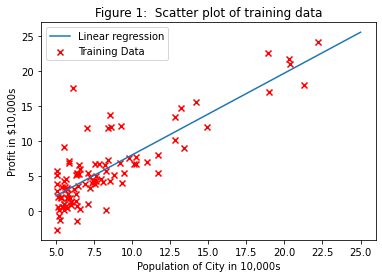

In [13]:
x = np.linspace(5,25)
function_h = theta.iloc[0,0] + theta.iloc[1,0]*x
plt.plot(x,function_h,label='Linear regression')
plt.scatter(df['population'],df['profit'], label='Training Data', color='r',marker="x")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Figure 1:  Scatter plot of training data')
plt.legend()
plt.show()

# 3  Linear regression with multiple variables

In [14]:
fpath = "ex1data2.txt"
df = pd.read_csv(
    fpath,
    sep=",",
    names=['house_size', 'number_of_bedroom','price']
)
df

,house_size,number_of_bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## 3.1  Feature Normalization

In [15]:
# Subtract the mean value of each feature from the dataset.
# ！注意：标准化的对象是每个变量对应的x值，而没有y值，所以最后一列不要标准化
def getAndSubtractMeanValue(df):
    featureNumber = df.shape[1] -1 # 没有最后一列
    rows = df.shape[0]
    means = []
    for j in range(featureNumber): 
        sum = 0.0
        for i in range(rows):
            sum = sum + df.iloc[i,j]
        means.append(sum/rows)
        # 减去均值
        for i in range(rows):
            df.iloc[i,j] = df.iloc[i,j] - means[j]
    return means

In [16]:
# After subtracting the mean, additionally scale (divide) the feature valuesby their respective “standard deviations.”
def getAndDivideStandardDeviation(df):
    featureNumber = df.shape[1] - 1   # 同上！，没有最后一列
    rows = df.shape[0]
    StandardDeviations = []
    for j in range(featureNumber):      
        sum = 0.0
        for i in range(rows):
            sum = sum + df.iloc[i,j]*df.iloc[i,j]
        StandardDeviations.append((sum/rows)**0.5)
        # 除以标准差
        for i in range(rows):
            df.iloc[i,j] = df.iloc[i,j]/StandardDeviations[j]
    return StandardDeviations

In [17]:
# 把两个操作合起来
def FeatureNormalization(df):
    return pd.DataFrame({
        'means': getAndSubtractMeanValue(df),
        'StandardDeviation':getAndDivideStandardDeviation(df)
    })
featureNormalization = FeatureNormalization(df)
print(featureNormalization)

         means  StandardDeviation
0  2000.680851         786.202619
1     3.170213           0.752843


In [18]:
print(df)

    house_size  number_of_bedroom   price
0     0.131415          -0.226093  399900
1    -0.509641          -0.226093  329900
2     0.507909          -0.226093  369000
3    -0.743677          -1.554392  232000
4     1.271071           1.102205  539900
5    -0.019945           1.102205  299900
6    -0.593589          -0.226093  314900
7    -0.729686          -0.226093  198999
8    -0.789467          -0.226093  212000
9    -0.644466          -0.226093  242500
10   -0.077182           1.102205  239999
11   -0.000866          -0.226093  347000
12   -0.140779          -0.226093  329999
13    3.150993           2.430504  699900
14   -0.931924          -0.226093  259900
15    0.380715           1.102205  449900
16   -0.865783          -1.554392  299900
17   -0.972626          -0.226093  199900
18    0.773743           1.102205  499998
19    1.310501           1.102205  599000
20   -0.297227          -0.226093  252900
21   -0.143323          -1.554392  255000
22   -0.504553          -0.226093 

## 3.2  Gradient Descent

In [19]:
# 多变量版本的梯度下降,假设不知道变量的个数
featureNumber = df.shape[1]
featureNumber

3

In [20]:
theta = [0]*featureNumber
def costJs(df,theta):
    m = df.shape[0]    # 行数
    n = df.shape[1]    # 列数
    # 累加
    sum = 0.0
    for i in range(m):
        h_theta = theta[0]
        for j in range(n-1):      # 不知道有几个变量，所以h(theta) 也得循环
            h_theta = h_theta + theta[j+1] * df.iloc[i,j]
        sum = sum + (h_theta - df.iloc[i,n-1]) ** 2
    return sum/(2*m)

In [21]:
def GradientDescents(df,theta,alpha):
    
    m = df.shape[0]    # 行数
    n = df.shape[1]    # 列数
    new_theta = [0] * n
    
    for j in range(n):
        sum = 0.0
        for i in range(m):
            h_theta = theta[0]
            for k in range(n-1): # 不知道有几个变量，所以h(theta) 也得循环
                h_theta = h_theta + theta[k+1]*df.iloc[i,k]
            if j == 0:
                h_theta = (h_theta - df.iloc[i,n-1])
            else:
                h_theta = (h_theta - df.iloc[i,n-1]) * df.iloc[i,j-1]
            sum = sum + h_theta
        new_theta[j] = theta[j] - alpha/m*sum
    return new_theta

In [22]:
theta = [0]*featureNumber   # 归 0 
for i in range(iterations):
    print(costJs(df,theta))   # 通过检查每一步的代价函数J(θ)变小来验证每一步的梯度下降正确工作 
    theta = GradientDescents(df,theta,alpha)
theta 

65591548106.45744
64297776251.62009
63031018305.52133
61790694237.532486
60576236901.99104
59387091739.988594
58222716488.38939
57082580895.8954
55966166445.97887
54872966086.50779
53802483965.89505
52754235175.605446
51727745498.85994
50722551165.38097
49738198612.02587
48774244249.16026
47830254232.62681
46905804241.16898
46000479259.17251
45113873364.59137
44245589521.92843
43395239380.144295
42562443075.3712
41746829038.31239
40948033806.209465
40165701839.264984
39399485341.40871
38649044085.30025
37914045241.46272
37194163211.445404
36489079464.915146
35798482380.58049
35122067090.852936
34459535330.1538
33810595286.776836
33174961458.21925
32552354509.895863
31942501137.15358
31345133930.505215
30759991244.00422
30186817066.683086
29625360896.981285
29075377620.089474
28536627388.13903
28008875503.167995
27491892302.795826
26985453048.541317
26489337816.7197
26003331391.856533
25527223162.557606
25060807019.77559
24603881257.41561
24156248475.223602
23717715483.90246
23288093212

2080078541.0953083
2079671310.7496877
2079269330.691324
2078872521.4715476
2078480805.0037122
2078094104.5379953
2077712344.63667
2077335451.1498656
2076963351.1917913
2076595973.1174128
2076233246.499581
2075875102.1066024
2075521471.8802347
2075172288.9141173
2074827487.4326
2074487002.769989
2074150771.350189
2073818730.6667361
2073490819.2632048
2073166976.714011
2072847143.6055596
2072531261.5177667
2072219273.005934
2071911121.5829654
2071606751.7019267
2071306108.7389364
2071009138.9763908
2070715789.5864968
2070426008.6151323
2070139744.9660022
2069856948.385105
2069577569.4454901
2069301559.5323143
2069028870.8281684
2068759456.298698
2068493269.6784832
2068230265.4572015
2067970398.8660405
2067713625.8643806
2067459903.1267169
2067209188.0298417
2066961438.6402621
2066716613.7018619
2066474672.623784
2066235575.4685693
2065999282.9404848
2065765756.374101
2065534957.723067
2065306849.5491138
2065081395.0112448
2064858557.8551526
2064638302.4028141
2064420593.542299
2064205396

2043809396.2900326
2043804738.988784
2043800122.7630012
2043795547.2484374
2043791012.0841193
2043786516.9123085
2043782061.3784788
2043777645.1312814
2043773267.8225214
2043768929.1071222
2043764628.6430995
2043760366.0915382
2043756141.116552
2043751953.385272
2043747802.5678027
2043743688.337206
2043739610.3694665
2043735568.3434746
2043731561.9409878
2043727590.8466117
2043723654.7477775
2043719753.3347049
2043715886.3003855
2043712053.3405576
2043708254.153672
2043704488.440882
2043700755.906006
2043697056.2555075
2043693389.1984708
2043689754.4465814
2043686151.7140927
2043682580.7178147
2043679041.1770794
2043675532.8137236
2043672055.3520696
2043668608.518893
2043665192.0434077
2043661805.6572437
2043658449.0944207
2043655122.0913293
2043651824.386711
2043648555.7216332
2043645315.8394716
2043642104.4858873
2043638921.4088044
2043635766.3583915
2043632639.087047
2043629539.3493671
2043626466.9021344
2043623421.5042956
2043620402.916941
2043617410.903291
2043614445.2286649
20436

2043289689.5568264
2043289604.913371
2043289521.013215
2043289437.84983
2043289355.4167445
2043289273.7075458
2043289192.7158787
2043289112.4354417
2043289032.8599856
2043288953.9833245
2043288875.7993174
2043288798.3018823
2043288721.4849925
2043288645.3426692
2043288569.8689892
2043288495.0580802
2043288420.9041235
2043288347.4013476
2043288274.544036
2043288202.3265185
2043288130.7431786
2043288059.788446
2043287989.4568017
2043287919.7427711
2043287850.6409328
2043287782.145911
2043287714.2523756
2043287646.955045
2043287580.2486835
2043287514.1281009
2043287448.5881543
2043287383.6237433
2043287319.2298152
2043287255.4013593
2043287192.1334095
2043287129.4210446
2043287067.2593844
2043287005.643594
2043286944.5688808
2043286884.0304897
2043286824.023713
2043286764.543883
2043286705.5863712
2043286647.146592
2043286589.2199974
2043286531.8020809
2043286474.8883767
2043286418.474456
2043286362.555929
2043286307.1284482
2043286252.1877003
2043286197.7294085
2043286143.7493393
2043286

[340412.563014392, 109370.05670466014, -6500.615095066833]

模型已建成，使用时注意要先将房子大小和卧室个数先标准化，然后再带入h_theta函数，即：

In [23]:
def predict(house_size,number_of_bedroom,theta,featureNormalization):
    
    means_of_house_size = featureNormalization.iloc[0,0]
    means_of_number_of_bedroom = featureNormalization.iloc[1,0]
    StandardDeviation_of_house_size = featureNormalization.iloc[0,1]
    StandardDeviation_of_number_of_bedroom = featureNormalization.iloc[1,1]
    
    return theta[0] + theta[1]*(house_size - means_of_house_size)/StandardDeviation_of_house_size + theta[2]*(number_of_bedroom - means_of_number_of_bedroom)/StandardDeviation_of_number_of_bedroom

In [24]:
predict(0,0,theta,featureNormalization)     # 我擦没房子都8.9w起....

89468.27916444896

### 3.2.1  Optional (ungraded) exercise: Selecting learning rates

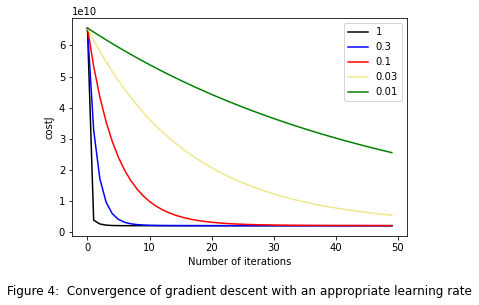

In [25]:
iterations = 50; # 迭代次数更改为50

# 学习率，通过更改不同的学习率 (i.e., 0.3, 0.1, 0.03, 0.01 and so on)，来观察 代价函数(竖轴) 和 迭代次数(横轴) 之间的关系 
# 如果学习率太大（在这个例子中可以为3），结果就不会收敛而是‘爆炸’。可以试一试3
alphas = [1,0.3,0.1,0.03,0.01];     
colors = ['black','blue','red','khaki','green']

for j in range(len(alphas)):
    alpha = alphas[j]
    y = []
    x = []
    theta = [0]*featureNumber   # 归 0 
    for i in range(iterations):
        y.append(costJs(df,theta))   # 通过检查每一步的代价函数J(θ)变小来验证每一步的梯度下降正确工作
        x.append(i)
        theta = GradientDescents(df,theta,alpha)
    plt.plot(x,y,color = colors[j],label = str(alpha))
plt.xlabel('Number of iterations')
plt.ylabel('costJ')
plt.title('Figure 4:  Convergence of gradient descent with an appropriate learning rate',y=-0.3)  # 第二个参数为更改标题位置，默认是放在图表上方的
plt.legend()
plt.show()

最后 用一个好的学习率来预测一下 the price of a house with 1650 square feet and 3 bedrooms

In [26]:
iterations = 50; # 迭代次数更改为50
alpha = 0.3
theta = [0]*featureNumber
for i in range(iterations):
    theta = GradientDescents(df,theta,alpha)
predict(1650,3,theta,featureNormalization) 

293092.21273075533

## 3.3 Normal Equations

In [27]:
fpath = "ex1data2.txt"
df = pd.read_csv(
    fpath,
    sep=",",
    names=['house_size', 'number_of_bedroom','price']
)
featureNumber = df.shape[1]

这下跑不掉了（前面偷懒没造，但是思路一样），得造 X ：

In [28]:
X = pd.DataFrame({
    'x0':1,
    'x1':df['house_size'],
    'x2':df['number_of_bedroom']
})
XT = pd.DataFrame(X.values.T)    # X的转置矩阵
Y = pd.DataFrame({
    'y':df['price']
})


XTX_inv = pd.DataFrame(np.linalg.pinv(XT.dot(X)))
theta1 = XTX_inv.dot(XT).dot(Y)

Optional (ungraded) exercise:
    Now,  once  you  have  foundθusing  thismethod, use it to make a price prediction for a 1650-square-foot house with3 bedrooms.  You should find that gives the same predicted price as the valueyou obtained using the model fit with gradient descent (in Section 3.2.1).

In [29]:
print('predict by Gradient Descent：',predict(1650,3,theta,featureNormalization))
print('predict by Normal Equations：',theta1.iloc[0,0]+theta1.iloc[1,0]*1650+theta1.iloc[2,0]*3) 

predict by Gradient Descent： 293092.21273075533
predict by Normal Equations： 293081.4643349717


# END